## LOAD DATASET


Import and visualize a sample of our datasets


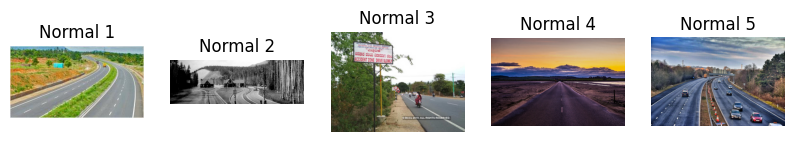

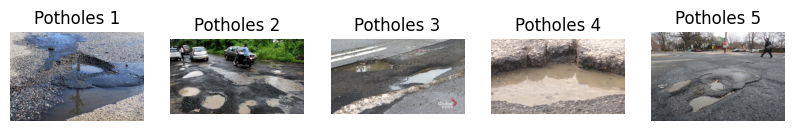

In [1]:
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Paths to dataset
normal_path = 'normal'
potholes_path = 'potholes'

# Function to display sample images
def show_samples(image_paths, title):
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()

# Show samples for both classes
normal_images = glob(os.path.join(normal_path, '*.jpg'))
potholes_images = glob(os.path.join(potholes_path, '*.jpg'))

show_samples(normal_images, 'Normal')
show_samples(potholes_images, 'Potholes')

In [2]:
# import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
import warnings
warnings.filterwarnings('ignore')

# PRE-PROCESSING



In [3]:
# Re-size and normalize each image before appending it on to the list
IMG_SIZE = (128, 128)

def preprocess_image(img):
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0  # Normalization
    return img

In [4]:
# Load and preprocess images from both classes
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = preprocess_image(img)  # Preprocess the image
            images.append(img)
            labels.append(label)
    return images, labels

normal_images, normal_labels = load_and_preprocess_images('normal', 0)
potholes_images, potholes_labels = load_and_preprocess_images('potholes', 1)

In [5]:
# Concatenate data and labels from both classes into single arrays
X = np.array(normal_images + potholes_images)
y = np.array(normal_labels + potholes_labels)

In [6]:
IMG_SIZE = (128, 128)

def preprocess_image(img):
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    return img

X_processed = np.array([preprocess_image(img) for img in X])

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

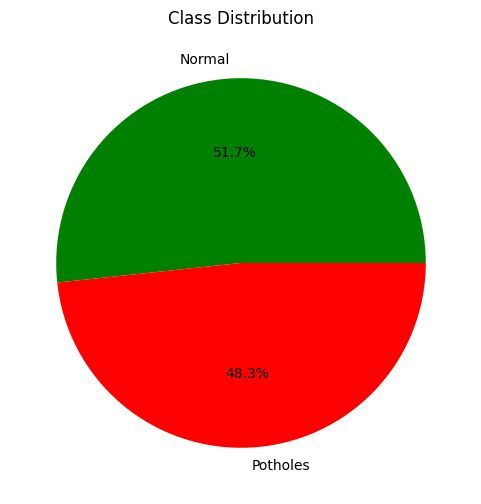

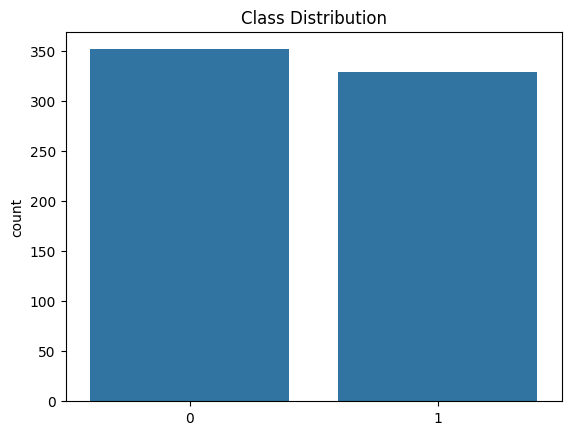

In [8]:
# Pie chart for class distribution
plt.figure(figsize=(6, 6))
plt.pie([np.sum(y == 0), np.sum(y == 1)], labels=['Normal', 'Potholes'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Class Distribution')
plt.show()

# Bar plot for class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

In [9]:
baseline_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

baseline_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = baseline_cnn.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.5018 - loss: 0.6959 - val_accuracy: 0.6058 - val_loss: 0.6919
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.4724 - loss: 0.6932 - val_accuracy: 0.3942 - val_loss: 0.6935
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.5055 - loss: 0.6932 - val_accuracy: 0.3942 - val_loss: 0.6935
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.5055 - loss: 0.6932 - val_accuracy: 0.3942 - val_loss: 0.6940
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.3942 - val_loss: 0.6939
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.3942 - val_loss: 0.6941
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.3942 - val_loss: 0.6942
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.

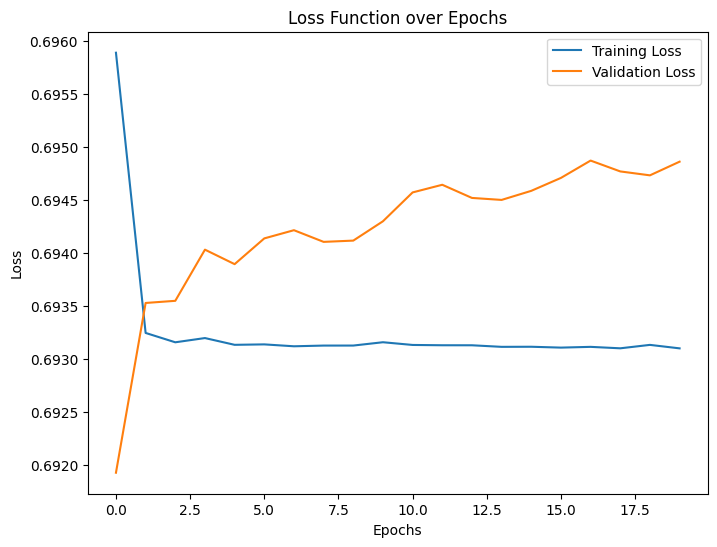

In [10]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

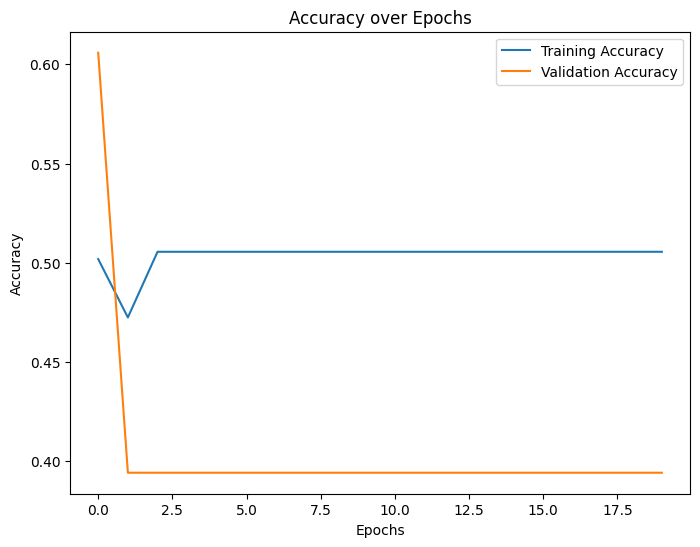

In [11]:
# Plot the training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()